# Semantic Factors by Dispersion Index
This notebook aims for an exploratory factor analysis of "The Glasgow Norm" -- a database with 5.553 English words classified into nine psycholinguistics dimensions.  

This notebook makes use of the dataset prepared in previous analysis.

## Introduction

### Libraries

In [1]:
## Data analysis packages:
import pandas as pd
import numpy as np
from math import isnan  #Verifies if a given valu e is numerical.

## Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Plotly Express
import plotly.graph_objs as go
import plotly

### Definitions

In [2]:
## Forcing Pandas to display any number of elements
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
pd.options.display.max_seq_items = 15000

## DataPrep

### Importing "The Glasgow Norms" dataset
Available at https://doi.org/10.3758/s13428-018-1099-3.  
The Glasgow Norms are a set of normative ratings for 5,553 English words on nine psycholinguistic dimensions: arousal, valence, dominance, concreteness, imageability, familiarity, age of acquisition, semantic size, and gender association.

In [3]:
## Reading the dataset file:
## -> header=[0,1] parameters indicates that rows [0,1] must be considered as dataset header.
glasgow = pd.read_csv('../data/GlasgowR_pandas_ready.csv')

In [4]:
glasgow.head()

,words,length,AROU_M,AROU_SD,AROU_N,VAL_M,VAL_SD,VAL_N,DOM_M,DOM_SD,DOM_N,CNC_M,CNC_SD,CNC_N,IMAG_M,IMAG_SD,IMAG_N,FAM_M,FAM_SD,FAM_N,AOA_M,AOA_SD,AOA_N,SIZE_M,SIZE_SD,SIZE_N,GEND_M,GEND_SD,GEND_N
0,abattoir,8,4.200,2.400,25,2.864,1.740,22,4.333,1.285,21,5.455,1.900,22,4.391,2.121,23,2.382,1.799,34,6.760,0.427,25,4.652,1.549,23,5.391,1.170,23
1,abbey,5,3.125,2.342,32,5.781,1.268,32,4.667,1.551,33,5.906,1.508,32,5.344,1.881,32,3.324,1.810,34,5.177,1.339,34,5.121,1.629,33,3.303,1.193,33
2,abbreviate,10,3.273,1.582,33,5.250,1.031,32,5.235,1.238,34,3.286,1.733,35,3.177,1.689,34,5.121,1.838,33,5.543,1.130,35,2.667,1.700,33,3.971,0.954,34
3,abdicate,8,4.194,1.941,31,3.767,1.383,30,4.419,2.182,31,3.367,1.853,30,2.516,1.521,31,3.971,2.077,35,6.233,0.844,30,4.679,1.441,28,5.167,1.186,30
4,abdication,10,3.846,2.282,26,3.880,1.608,25,4.800,1.960,25,3.292,1.620,24,2.571,1.294,28,3.097,2.022,31,6.407,0.913,27,5.083,1.351,24,4.571,1.015,28


Setting the columns "words" as dataframe index:

In [5]:
glasgow.set_index('words', inplace=True)

----
### Segmenting the database into variables of interest

In [6]:
import re

In [7]:
## Listing only columns related to _M (mean) and _SD (standard deviation)
interest = ['AROU_M', 'AROU_SD',
                   'VAL_M', 'VAL_SD',
                   'DOM_M', 'DOM_SD',
                   'CNC_M', 'CNC_SD',
                   'IMAG_M', 'IMAG_SD',
                   'FAM_M', 'FAM_SD',
                   'AOA_M', 'AOA_SD',
                   'SIZE_M', 'SIZE_SD',
                   'GEND_M', 'GEND_SD']

### Selecting only columns related to _M (mean)

In [8]:
tmp_pattern_M = re.compile(r'.*_M$')
tmp_M_parameters = list(filter(tmp_pattern_M.match, interest))

print(tmp_M_parameters)

['AROU_M', 'VAL_M', 'DOM_M', 'CNC_M', 'IMAG_M', 'FAM_M', 'AOA_M', 'SIZE_M', 'GEND_M']


In [9]:
df_M = glasgow[tmp_M_parameters]
df_M

,AROU_M,VAL_M,DOM_M,CNC_M,IMAG_M,FAM_M,AOA_M,SIZE_M,GEND_M
words,,,,,,,,,
abattoir,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391
abbey,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303
abbreviate,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971
abdicate,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167
abdication,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571
...,...,...,...,...,...,...,...,...,...
zeppelin,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269
zero,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172
zest,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452


----
### Selecting only columns related to _SD (standard deviation)

In [10]:
tmp_pattern_SD = re.compile(r'.*_SD$')
tmp_SD_parameters = list(filter(tmp_pattern_SD.match, interest))

print(tmp_SD_parameters)

['AROU_SD', 'VAL_SD', 'DOM_SD', 'CNC_SD', 'IMAG_SD', 'FAM_SD', 'AOA_SD', 'SIZE_SD', 'GEND_SD']


In [11]:
## Selecting a dataframe with SD values:
df_SD = glasgow[tmp_SD_parameters]
df_SD

,AROU_SD,VAL_SD,DOM_SD,CNC_SD,IMAG_SD,FAM_SD,AOA_SD,SIZE_SD,GEND_SD
words,,,,,,,,,
abattoir,2.400,1.740,1.285,1.900,2.121,1.799,0.427,1.549,1.170
abbey,2.342,1.268,1.551,1.508,1.881,1.810,1.339,1.629,1.193
abbreviate,1.582,1.031,1.238,1.733,1.689,1.838,1.130,1.700,0.954
abdicate,1.941,1.383,2.182,1.853,1.521,2.077,0.844,1.441,1.186
abdication,2.282,1.608,1.960,1.620,1.294,2.022,0.913,1.351,1.015
...,...,...,...,...,...,...,...,...,...
zeppelin,2.037,1.414,1.743,0.920,1.123,2.115,0.944,1.721,1.021
zero,2.023,1.585,2.124,1.895,2.347,1.195,1.123,1.393,0.647
zest,2.158,1.313,1.320,1.694,1.622,1.626,1.123,1.738,1.011


---
### Preparing a dataframe with Mean, SD

In [12]:
## Combining mean, standard deviation, and variance:
df_M_SD = pd.concat([df_M, df_SD], axis=1)
df_M_SD

,AROU_M,VAL_M,DOM_M,CNC_M,IMAG_M,FAM_M,AOA_M,SIZE_M,GEND_M,AROU_SD,VAL_SD,DOM_SD,CNC_SD,IMAG_SD,FAM_SD,AOA_SD,SIZE_SD,GEND_SD
words,,,,,,,,,,,,,,,,,,
abattoir,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,2.400,1.740,1.285,1.900,2.121,1.799,0.427,1.549,1.170
abbey,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,2.342,1.268,1.551,1.508,1.881,1.810,1.339,1.629,1.193
abbreviate,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,1.582,1.031,1.238,1.733,1.689,1.838,1.130,1.700,0.954
abdicate,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,1.941,1.383,2.182,1.853,1.521,2.077,0.844,1.441,1.186
abdication,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,2.282,1.608,1.960,1.620,1.294,2.022,0.913,1.351,1.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeppelin,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,2.037,1.414,1.743,0.920,1.123,2.115,0.944,1.721,1.021
zero,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,2.023,1.585,2.124,1.895,2.347,1.195,1.123,1.393,0.647
zest,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,2.158,1.313,1.320,1.694,1.622,1.626,1.123,1.738,1.011


----
## Correlation Analysis of the mean of psycholinguistics dimensions

<Axes: >

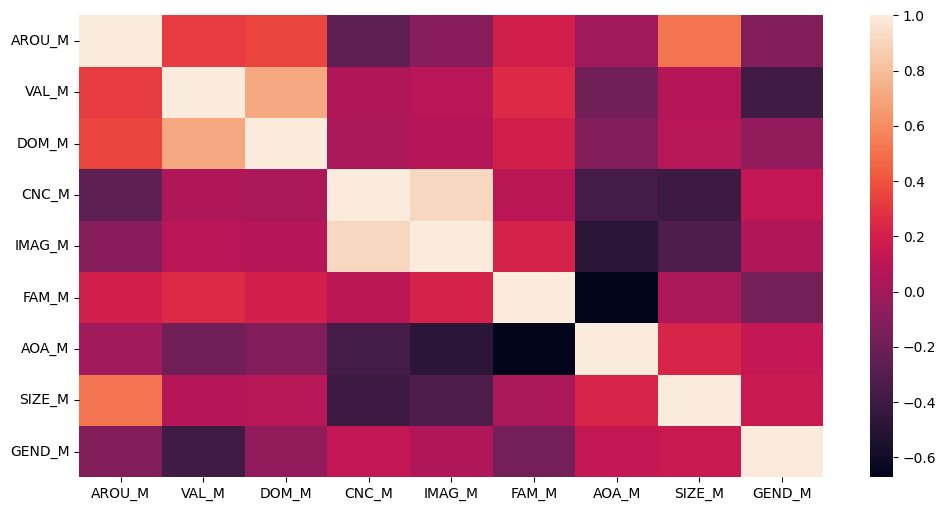

In [13]:
## Plotting the correlation map only for Mean values
plt.figure(figsize=(12,6))
c= df_M.corr()
sns.heatmap(c)

----
### Preparing a full dataframe with Mean, SD, and DI

In [14]:
## Combining mean, standard deviation, and variance:
df = pd.concat([df_M, df_SD], axis=1)
df

,AROU_M,VAL_M,DOM_M,CNC_M,IMAG_M,FAM_M,AOA_M,SIZE_M,GEND_M,AROU_SD,VAL_SD,DOM_SD,CNC_SD,IMAG_SD,FAM_SD,AOA_SD,SIZE_SD,GEND_SD
words,,,,,,,,,,,,,,,,,,
abattoir,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,2.400,1.740,1.285,1.900,2.121,1.799,0.427,1.549,1.170
abbey,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,2.342,1.268,1.551,1.508,1.881,1.810,1.339,1.629,1.193
abbreviate,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,1.582,1.031,1.238,1.733,1.689,1.838,1.130,1.700,0.954
abdicate,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,1.941,1.383,2.182,1.853,1.521,2.077,0.844,1.441,1.186
abdication,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,2.282,1.608,1.960,1.620,1.294,2.022,0.913,1.351,1.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeppelin,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,2.037,1.414,1.743,0.920,1.123,2.115,0.944,1.721,1.021
zero,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,2.023,1.585,2.124,1.895,2.347,1.195,1.123,1.393,0.647
zest,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,2.158,1.313,1.320,1.694,1.622,1.626,1.123,1.738,1.011


-----
### Visualizing features with confidence interval:

In [15]:
import plotly.graph_objects as go
import plotly.colors as pc

import cufflinks as cf


def viz_GlasgowR(words=['dog', 'cat'], dataframe=None):
    '''Visualiza as features psicolínguisticas de uma lista de palavras a partir 
    dos parâmetros dispostos no The Glasgow Norm, já carregados no dataframe "words". 
    Sintaxe: viz_GlasgowR(words, dataframe), onde:
        words = lista de strings contidas no dicionário/base Glasgow Rate.
        dataframe = DataFrame contendo os dados.
        
    Updated: 2023.08.26 - Adding alpha channel to plot standard deviation.
    '''
    if dataframe is None:
        raise ValueError("You need to provide a DataFrame containing the data.")

    ## Eixo-x, numérico:
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    ## Rótulo do eixo-x:
    xticks = ['AROU', 'VAL', 'DOM', 'CNC', 'IMAG', 'FAM', 'AOA', 'SIZE', 'GEND']
    ## Labels a serem buscados no dicionário Glasgow:
    label_M = ['AROU_M', 'VAL_M', 'DOM_M', 'CNC_M', 'IMAG_M', 'FAM_M', 'AOA_M', 'SIZE_M', 'GEND_M']
    label_SD = ['AROU_SD', 'VAL_SD', 'DOM_SD', 'CNC_SD', 'IMAG_SD', 'FAM_SD', 'AOA_SD', 'SIZE_SD', 'GEND_M']
    
    # Generate a list of unique colors using Plotly's color scales
    num_colors = len(words)
    colors = pc.qualitative.Plotly[:num_colors]
    
    fig = go.Figure()

    for word, color in zip(words, colors):
        if word in dataframe.index:
            feat_M = list(dataframe.loc[word][label_M])
            feat_SD = list(dataframe.loc[word][label_SD])
            y_upper = [a + b for a, b in zip(feat_M, feat_SD)]
            y_lower = [a - b for a, b in zip(feat_M, feat_SD)]

            fig.add_trace(go.Scatter(
                x=x,
                y=feat_M,
                line=dict(color=color),  # Assign a unique color to each word
                mode='lines',
                name=word,
                showlegend=True
            ))

            fig.add_trace(go.Scatter(
                x=x + x[::-1],  # x, then x reversed
                y=y_upper + y_lower[::-1],  # upper, then lower reversed
                fill='toself',
                # fillcolor='rgba(0,100,80,0.2)',
                # HEX to RGBA (transparency)
                fillcolor=cf.colors.to_rgba(color,.2),
                line=dict(color='rgba(255,255,255,0)'),
                hoverinfo="skip",
                showlegend=False
            ))
        
    ## Atualizando o xtick label a partir do nome das colunas:
    fig.update_layout(
        xaxis=dict(
            tickmode='array',
            tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9],
            ticktext=xticks
        )
    )
    
    return fig

In [16]:
df.loc['gun']

AROU_M     5.571
VAL_M      2.800
DOM_M      5.147
CNC_M      6.441
IMAG_M     6.686
FAM_M      6.429
AOA_M      2.857
SIZE_M     3.647
GEND_M     6.057
AROU_SD    2.739
VAL_SD     2.135
DOM_SD     2.992
CNC_SD     1.090
IMAG_SD    0.785
FAM_SD     0.871
AOA_SD     1.199
SIZE_SD    1.998
GEND_SD    0.826
Name: gun, dtype: float64

In [17]:
viz_GlasgowR(words=['woman'], dataframe=df)

In [18]:
viz_GlasgowR(words=['dog', 'dream'], dataframe=df)

> Experimenting some words visualization:

In [20]:
fig_dog = viz_GlasgowR(['elephant','worm'], df)
fig_dog

> EBNS suggested the words "snake" e "dog".  
> How does it compare to known symbols, i.e., words whose relationships are already known?

In [21]:
## Showing the interest attributes for the words SNAKE and DOG:
df.loc[['snake', 'dog'],interest]

,AROU_M,AROU_SD,VAL_M,VAL_SD,DOM_M,DOM_SD,CNC_M,CNC_SD,IMAG_M,IMAG_SD,FAM_M,FAM_SD,AOA_M,AOA_SD,SIZE_M,SIZE_SD,GEND_M,GEND_SD
words,,,,,,,,,,,,,,,,,,
snake,4.909,2.366,3.657,1.620,5.257,2.047,6.714,0.700,6.657,0.630,5.647,1.473,2.529,0.947,3.091,1.621,5.200,1.064
dog,6.147,2.185,7.067,1.237,6.242,1.793,6.833,0.453,6.889,0.314,6.840,0.463,1.735,0.656,3.273,1.238,4.606,0.983


In [22]:
viz_GlasgowR(['snake','dog'], glasgow)

In [23]:
df.loc['jigsaw']

AROU_M     3.323
VAL_M      5.548
DOM_M      5.563
CNC_M      6.219
IMAG_M     6.438
FAM_M      5.710
AOA_M      2.576
SIZE_M     2.323
GEND_M     3.909
AROU_SD    1.941
VAL_SD     1.187
DOM_SD     1.540
CNC_SD     1.111
IMAG_SD    0.899
FAM_SD     1.689
AOA_SD     1.393
SIZE_SD    1.254
GEND_SD    0.793
Name: jigsaw, dtype: float64

In [24]:
viz_GlasgowR(['snake','dog','evil'], df)

In [25]:
viz_GlasgowR(['child','baby','human'], df)

----
# Factor Analysis (based on the **mean**)
Based on the https://towardsdatascience.com/factor-analysis-a-complete-tutorial-1b7621890e42.
> It is not a detailed tutorial.    

This tutorial brings more reference on factor analysis calculation: https://medium.com/@hongwy1128/intro-guide-to-factor-analysis-python-84dd0b0fd729

In [90]:
from factor_analyzer import FactorAnalyzer

In [91]:
## Copiando um novo dataframe para análise fatorial, com base no "new_df"
colunas_M = df_M.columns

In [94]:
df_M = new_df[colunas_M]

In [95]:
df_M.head()

,AROU_M,VAL_M,DOM_M,CNC_M,IMAG_M,FAM_M,AOA_M,SIZE_M,GEND_M
words,,,,,,,,,
abattoir,4.200,2.084680,0.648718,5.455,4.391,2.382,6.760,4.652,5.391
abbey,3.125,0.196445,0.191906,5.906,5.344,3.324,5.177,5.121,3.303
abbreviate,3.273,0.009942,0.034842,3.286,3.177,5.121,5.543,2.667,3.971
abdicate,4.194,0.739039,0.505294,3.367,2.516,3.971,6.233,4.679,5.167
abdication,3.846,0.618696,0.085139,3.292,2.571,3.097,6.407,5.083,4.571


In [96]:
## Creating the estimator (Factor analyzer)
fa = FactorAnalyzer()

## fa.fit(df_M)
fa.fit(df_M)


FactorAnalyzer(rotation_kwargs={})

In [97]:
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev

array([3.05273261, 1.96606193, 1.19521152, 0.85567549, 0.79475496,
       0.43388368, 0.37622251, 0.25968046, 0.06577683])

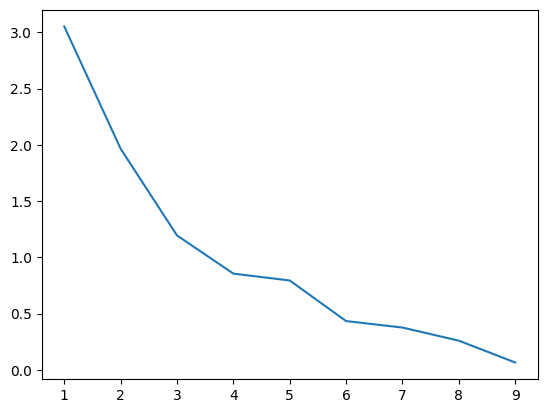

In [98]:
plt.plot(range(1,df_M.shape[1]+1),ev)

> Fatores com auto-valor <= 1 é um fator não mais informativo do que uma única variável. Traz igual ou menos informação do que uma variável sozinha.

### Choosing two factors and analyzing their structure:

> Choosing 2 factors (> than 2).
>> Although I would like to have just 2 -> objective and subjective.

In [89]:
new_df

,AROU_M,VAL_M,DOM_M,CNC_M,IMAG_M,FAM_M,AOA_M,SIZE_M,GEND_M,AROU_SD,VAL_SD,DOM_SD,CNC_SD,IMAG_SD,FAM_SD,AOA_SD,SIZE_SD,GEND_SD
words,,,,,,,,,,,,,,,,,,
abattoir,4.200,2.084680,0.648718,5.455,4.391,2.382,6.760,4.652,5.391,2.400,1.740,1.285,1.900,2.121,1.799,0.427,1.549,1.170
abbey,3.125,0.196445,0.191906,5.906,5.344,3.324,5.177,5.121,3.303,2.342,1.268,1.551,1.508,1.881,1.810,1.339,1.629,1.193
abbreviate,3.273,0.009942,0.034842,3.286,3.177,5.121,5.543,2.667,3.971,1.582,1.031,1.238,1.733,1.689,1.838,1.130,1.700,0.954
abdicate,4.194,0.739039,0.505294,3.367,2.516,3.971,6.233,4.679,5.167,1.941,1.383,2.182,1.853,1.521,2.077,0.844,1.441,1.186
abdication,3.846,0.618696,0.085139,3.292,2.571,3.097,6.407,5.083,4.571,2.282,1.608,1.960,1.620,1.294,2.022,0.913,1.351,1.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeppelin,6.185,0.003847,0.086700,6.286,6.185,3.167,6.036,5.464,5.269,2.037,1.414,1.743,0.920,1.123,2.115,0.944,1.721,1.021
zero,4.031,0.349520,0.300368,2.688,3.903,6.269,2.636,1.758,4.172,2.023,1.585,2.124,1.895,2.347,1.195,1.123,1.393,0.647
zest,5.969,1.241166,1.348277,4.438,4.033,4.000,5.364,2.636,3.452,2.158,1.313,1.320,1.694,1.622,1.626,1.123,1.738,1.011


In [99]:
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(df_M)
loads = fa.loadings_
print(loads)

[[-0.03697147  0.63281757 -0.10705895]
 [-0.12404707  0.7105553  -0.03000735]
 [-0.14510333  0.53307656 -0.01267023]
 [ 0.9327479  -0.35642961 -0.00551559]
 [ 0.90395745 -0.18342978 -0.16141953]
 [ 0.15741694  0.1886713  -0.76701075]
 [-0.36866195  0.07872375  0.80292945]
 [-0.17534456  0.65330968  0.13119103]
 [ 0.12832966  0.03173261  0.26818272]]


### Analyzing the factor structure:

In [100]:
def highlight_high_values(val, th=0.5):
    ''' Highlights values higher or lower than 0.5. Must be applied as a map in a Pandas.DataFrame style.
    '''
    # color = 'background-color: yellow' if ((val > th) or (val < -th)) else ''
    if (val > th):
        color = 'background-color: yellow' 
    elif (val < -th):
        color = 'background-color: red'
    else:
        color = ''
    return color

In [101]:
## Creating a dataframe with the loading values and column names:
factors = pd.DataFrame(fa.loadings_, columns=['Factor 1','Factor 2','Factor 3'], index=[df_M.columns])

In [102]:
factors.style.applymap(highlight_high_values, th=0.4)

C:\Users\tiago\AppData\Local\Temp\ipykernel_19068\1062230875.py:1: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Factor 1,Factor 2,Factor 3
AROU_M,-0.036971,0.632818,-0.107059
VAL_M,-0.124047,0.710555,-0.030007
DOM_M,-0.145103,0.533077,-0.012670
CNC_M,0.932748,-0.356430,-0.005516
IMAG_M,0.903957,-0.183430,-0.161420
FAM_M,0.157417,0.188671,-0.767011
AOA_M,-0.368662,0.078724,0.802929
SIZE_M,-0.175345,0.653310,0.131191
GEND_M,0.128330,0.031733,0.268183


### Discussion regarding Factor Analysis:
- As expected to, it seems **Factor 1** may relate to objectivity:  
    > It is strongly related to concreteness; and  
    > It is strongly related to imageability, i.e., how ones can easily imagine or picture a given concept.

- **Factor 2**, on the other hand, seems to relate to subjectivity, strongly influenced by valence, dominance and partially related to arousal.  

- A third factor emerges from these data, **Factor 3**, mostly related to familiarity and less negativaly influenced by age of acquisition. This factor can be theoretically associated to context.

In [103]:
factors_name = ['F_Objectivity','F_Subjectivity','F_Context']

### Calculating Factor Variance:

In [104]:
variance_metrics = fa.get_factor_variance()

# A Soma dos Quadrados dos Loadings estará na terceira coluna (índice 2)
sum_squared_loadings = variance_metrics[2]

print("Sum of Squared Loadings por fator:", sum_squared_loadings)

Sum of Squared Loadings por fator: [0.21476369 0.41696601 0.56815973]


In [106]:
pd.DataFrame(variance_metrics, columns=factors_name, index=['SumSquared Loadings','Proportional Var','Cumulative Var'])

,F_Objectivity,F_Subjectivity,F_Context
SumSquared Loadings,1.932873,1.819821,1.360744
Proportional Var,0.214764,0.202202,0.151194
Cumulative Var,0.214764,0.416966,0.568160


> The "Cumulative Variance" above indicates that 58% of the variance of the data is explained by these three factors.

### Creating the latent variables:

In [241]:
scores = pd.DataFrame(fa.transform(df_M), columns=factors_name, index=df_M.index)

In [242]:
scores

,F_Objectivity,F_Subjectivity,F_Context
words,,,
abattoir,0.675484,0.039687,2.919345
abbey,0.866506,-0.575436,1.655093
abbreviate,-1.521810,-1.133314,0.293377
abdicate,-1.081270,-0.268950,1.510208
abdication,-1.109291,-0.387681,1.908779
...,...,...,...
zeppelin,1.429476,0.343244,2.289489
zero,-1.905249,-0.954305,-1.955948
zest,-0.265506,-0.273107,0.936929


In [243]:
fa.get_communalities()

array([0.41328658, 0.52117696, 0.30538613, 0.99709114, 0.87684181,
       0.64868245, 0.78680476, 0.47477034, 0.08939743])

In [244]:
scores.describe()

,F_Objectivity,F_Subjectivity,F_Context
count,5.553000e+03,5.553000e+03,5.553000e+03
mean,-3.518805e-16,5.118262e-18,-2.571927e-16
std,9.808877e-01,8.654898e-01,9.081210e-01
min,-2.363638e+00,-1.683598e+00,-2.482114e+00
25%,-8.556189e-01,-6.537203e-01,-6.755254e-01
50%,1.098310e-03,-1.632170e-01,-3.615042e-02
75%,9.010905e-01,5.035975e-01,6.441763e-01
max,2.283602e+00,3.283163e+00,2.919345e+00


In [245]:
## Exemplifying with a trial word:
scores.loc['dog']

F_Objectivity     1.764975
F_Subjectivity    0.436157
F_Context        -1.378466
Name: dog, dtype: float64

## Evaluating factor distributions:

In [246]:
scores

,F_Objectivity,F_Subjectivity,F_Context
words,,,
abattoir,0.675484,0.039687,2.919345
abbey,0.866506,-0.575436,1.655093
abbreviate,-1.521810,-1.133314,0.293377
abdicate,-1.081270,-0.268950,1.510208
abdication,-1.109291,-0.387681,1.908779
...,...,...,...
zeppelin,1.429476,0.343244,2.289489
zero,-1.905249,-0.954305,-1.955948
zest,-0.265506,-0.273107,0.936929


### Word analysis

In [247]:
factors.style.applymap(highlight_high_values, th=0.4)

C:\Users\tiago\AppData\Local\Temp\ipykernel_19068\1062230875.py:1: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Factor 1,Factor 2,Factor 3
AROU_M,-0.036971,0.632818,-0.107059
VAL_M,-0.124047,0.710555,-0.030007
DOM_M,-0.145103,0.533077,-0.012670
CNC_M,0.932748,-0.356430,-0.005516
IMAG_M,0.903957,-0.183430,-0.161420
FAM_M,0.157417,0.188671,-0.767011
AOA_M,-0.368662,0.078724,0.802929
SIZE_M,-0.175345,0.653310,0.131191
GEND_M,0.128330,0.031733,0.268183


In [248]:
viz_GlasgowR(['hate'], df)

In [249]:
scores.loc['fire']

F_Objectivity     1.656037
F_Subjectivity    0.877458
F_Context        -0.913398
Name: fire, dtype: float64

### Standardizing a given column or attribute

In [250]:
# Função para normalizar uma coluna específica
def normalizar_coluna(dataframe, coluna):
    # Calcular média e desvio padrão
    media = dataframe[coluna].mean()
    desvio_padrao = dataframe[coluna].std()
    
    # Normalizar a coluna
    dataframe[coluna] = (dataframe[coluna] - media) / desvio_padrao
    
    return dataframe


In [48]:
df.describe()

,AROU_M,VAL_M,DOM_M,CNC_M,IMAG_M,FAM_M,AOA_M,SIZE_M,GEND_M,AROU_SD,VAL_SD,DOM_SD,CNC_SD,IMAG_SD,FAM_SD,AOA_SD,SIZE_SD,GEND_SD
count,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000
mean,4.627180,5.095874,5.065290,4.642565,4.787397,5.256607,4.134724,4.087411,4.123718,2.026726,1.240805,1.747837,1.362937,1.428643,1.470417,1.159954,1.369579,1.031987
std,1.095891,1.545788,0.909191,1.416407,1.348282,0.926752,1.242402,1.021217,0.910877,0.306326,0.316909,0.402025,0.369325,0.413937,0.371960,0.224959,0.233913,0.228784
min,2.057000,1.030000,1.941000,1.636000,1.737000,1.647000,1.219000,1.364000,1.000000,0.900000,0.167000,0.453000,0.232000,0.235000,0.239000,0.167000,0.373000,0.000000
25%,3.774000,4.188000,4.576000,3.343000,3.606000,4.677000,3.118000,3.387000,3.625000,1.822000,1.029000,1.467000,1.134000,1.167000,1.215000,1.014000,1.209000,0.879000
50%,4.515000,5.286000,5.147000,4.636000,4.788000,5.406000,4.171000,4.125000,4.143000,2.019000,1.224000,1.720000,1.433000,1.525000,1.513000,1.166000,1.356000,1.016000
75%,5.364000,6.059000,5.606000,6.029000,6.091000,5.969000,5.133000,4.829000,4.686000,2.221000,1.434000,2.006000,1.624000,1.731000,1.755000,1.305000,1.516000,1.171000
max,8.177000,8.647000,8.371000,6.943000,6.941000,6.939000,6.971000,6.912000,6.971000,3.261000,3.062000,3.305000,2.487000,2.460000,2.384000,2.236000,2.446000,2.285000


In [85]:
new_df = df.copy()

In [86]:
#new_df = normalizar_coluna(new_df, ['AROU_M','VAL_M','DOM_M'])
new_df = normalizar_coluna(new_df, ['VAL_M','DOM_M'])

In [87]:
#new_df['AROU_M'] = new_df['AROU_M']**2
new_df['VAL_M'] = new_df['VAL_M']**2
new_df['DOM_M'] = new_df['DOM_M']**2

In [88]:
new_df.describe()

,AROU_M,VAL_M,DOM_M,CNC_M,IMAG_M,FAM_M,AOA_M,SIZE_M,GEND_M,AROU_SD,VAL_SD,DOM_SD,CNC_SD,IMAG_SD,FAM_SD,AOA_SD,SIZE_SD,GEND_SD
count,5553.000000,5.553000e+03,5.553000e+03,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000
mean,4.627180,9.998199e-01,9.998199e-01,4.642565,4.787397,5.256607,4.134724,4.087411,4.123718,2.026726,1.240805,1.747837,1.362937,1.428643,1.470417,1.159954,1.369579,1.031987
std,1.095891,1.295221e+00,1.543170e+00,1.416407,1.348282,0.926752,1.242402,1.021217,0.910877,0.306326,0.316909,0.402025,0.369325,0.413937,0.371960,0.224959,0.233913,0.228784
min,2.057000,5.306663e-07,1.015656e-07,1.636000,1.737000,1.647000,1.219000,1.364000,1.000000,0.900000,0.167000,0.453000,0.232000,0.235000,0.239000,0.167000,0.373000,0.000000
25%,3.774000,5.397514e-02,6.664290e-02,3.343000,3.606000,4.677000,3.118000,3.387000,3.625000,1.822000,1.029000,1.467000,1.134000,1.167000,1.215000,1.014000,1.209000,0.879000
50%,4.515000,3.728447e-01,3.299991e-01,4.636000,4.788000,5.406000,4.171000,4.125000,4.143000,2.019000,1.224000,1.720000,1.433000,1.525000,1.513000,1.166000,1.356000,1.016000
75%,5.364000,1.563941e+00,1.260360e+00,6.029000,6.091000,5.969000,5.133000,4.829000,4.686000,2.221000,1.434000,2.006000,1.624000,1.731000,1.755000,1.305000,1.516000,1.171000
max,8.177000,6.918434e+00,1.321963e+01,6.943000,6.941000,6.939000,6.971000,6.912000,6.971000,3.261000,3.062000,3.305000,2.487000,2.460000,2.384000,2.236000,2.446000,2.285000


In [116]:
## Comparando agora a visualização do dataframe original e deste normalizado e elevado ao quadrado:
viz_GlasgowR(['coin'], df)


In [117]:
viz_GlasgowR(['sex'], new_df)

### Testes com as palavras após normalização de Valência e Dominância

In [123]:
factors.style.applymap(highlight_high_values, th=0.4)

C:\Users\tiago\AppData\Local\Temp\ipykernel_19068\1062230875.py:1: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Factor 1,Factor 2,Factor 3
AROU_M,-0.036971,0.632818,-0.107059
VAL_M,-0.124047,0.710555,-0.030007
DOM_M,-0.145103,0.533077,-0.012670
CNC_M,0.932748,-0.356430,-0.005516
IMAG_M,0.903957,-0.183430,-0.161420
FAM_M,0.157417,0.188671,-0.767011
AOA_M,-0.368662,0.078724,0.802929
SIZE_M,-0.175345,0.653310,0.131191
GEND_M,0.128330,0.031733,0.268183


In [255]:
word = 'suffering'

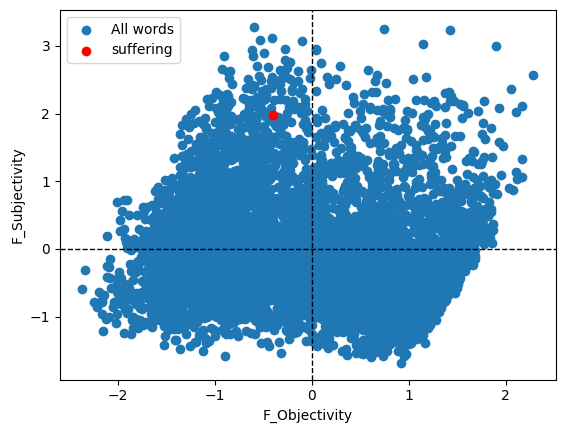

F_Objectivity    -0.403513
F_Subjectivity    1.977083
F_Context        -0.033390
Name: suffering, dtype: float64

In [256]:
plot_word(word)
scores.loc[word]

----
### Scaling the factor loads:

In [257]:
from sklearn.preprocessing import MinMaxScaler

In [263]:
# Inicialize o MinMaxScaler
scaler = MinMaxScaler()

# Ajuste e transforme as cargas fatoriais
score_scaled = scaler.fit_transform(scores)

# Crie um novo DataFrame com as cargas fatoriais redimensionadas
score_scaled_df = pd.DataFrame(score_scaled, columns=['F_Objectivity', 'F_Subjectivity', 'F_Context'], index=scores.index)

In [264]:

# Exiba o novo DataFrame
print(score_scaled_df)

            F_Objectivity  F_Subjectivity  F_Context
words                                               
abattoir         0.653963        0.346964   1.000000
abbey            0.695067        0.223116   0.765943
abbreviate       0.181146        0.110793   0.513841
abdicate         0.275942        0.284823   0.739119
abdication       0.269912        0.260918   0.812909
...                   ...             ...        ...
zeppelin         0.816208        0.408081   0.883392
zero             0.098637        0.146835   0.097412
zest             0.451479        0.283986   0.632985
zoo              0.786118        0.400954   0.325238
zoology          0.450084        0.269505   0.680909

[5553 rows x 3 columns]


In [267]:
def plot_semantics(word, scores=scores):
    # Create a scatter plot for all points
    plt.scatter(scores[x_column], scores[y_column], label='All words')

    # Add horizontal and vertical lines at 0
    plt.axhline(0.5, color='black', linestyle='--', linewidth=1)
    plt.axvline(0.5, color='black', linestyle='--', linewidth=1)

    try:
        # Highlight the specific point
        highlight_x = scores.loc[word, x_column]
        highlight_y = scores.loc[word, y_column]
        plt.scatter(highlight_x, highlight_y, color='red', label=f'{word}')

    except KeyError:
        # If the word is not in the DataFrame, print a warning
        print(f'Warning: {word} is not scored.')

    # Add labels and legend
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()

    # Show the plot
    plt.show()


In [268]:
score_scaled_df.describe()

,F_Objectivity,F_Subjectivity,F_Context
count,5553.000000,5553.000000,5553.000000
mean,0.508611,0.338973,0.459527
std,0.211069,0.174256,0.168125
min,0.000000,0.000000,0.000000
25%,0.324498,0.207354,0.334463
50%,0.508847,0.306111,0.452834
75%,0.702509,0.440367,0.578786
max,1.000000,1.000000,1.000000


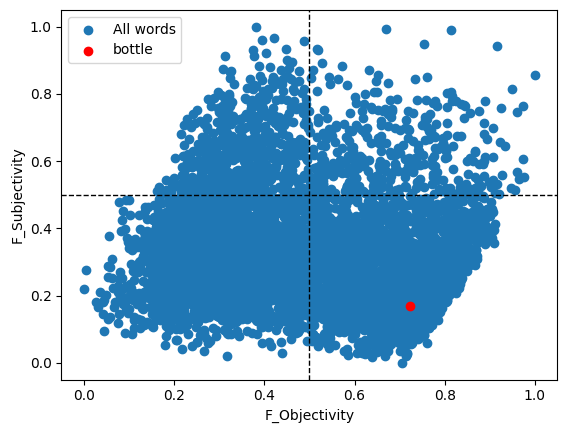

F_Objectivity     0.723551
F_Subjectivity    0.167867
F_Context         0.229897
Name: bottle, dtype: float64

In [282]:
word = 'bottle'

plot_semantics(word, scores=score_scaled_df)
score_scaled_df.loc[word]

In [152]:
viz_GlasgowR([word], new_df)

In [153]:
viz_GlasgowR([word], df)

In [154]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5553 entries, abattoir to zoology
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   F_Objectivity   5553 non-null   float64
 1   F_Subjectivity  5553 non-null   float64
 2   F_Context       5553 non-null   float64
 3   Cluster         5553 non-null   int32  
dtypes: float64(3), int32(1)
memory usage: 324.3+ KB


In [155]:
scores.describe()

,F_Objectivity,F_Subjectivity,F_Context,Cluster
count,5.553000e+03,5.553000e+03,5.553000e+03,5553.000000
mean,-3.518805e-16,5.118262e-18,-2.571927e-16,0.985413
std,9.808877e-01,8.654898e-01,9.081210e-01,0.800961
min,-2.363638e+00,-1.683598e+00,-2.482114e+00,0.000000
25%,-8.556189e-01,-6.537203e-01,-6.755254e-01,0.000000
50%,1.098310e-03,-1.632170e-01,-3.615042e-02,1.000000
75%,9.010905e-01,5.035975e-01,6.441763e-01,2.000000
max,2.283602e+00,3.283163e+00,2.919345e+00,2.000000


In [138]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [139]:
# Assuming the DataFrame is loaded as 'scores'
# Standardize the data (important for K-Means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(scores)

# Choose the number of clusters (you can adjust this)
num_clusters = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data_scaled)

# Add cluster labels to your DataFrame
scores['Cluster'] = kmeans.labels_

c:\Users\tiago\OneDrive - UNIVALI\PhD\atividades de pesquisa\semantic_factors\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [140]:
import plotly.express as px

In [141]:
# Create a 3D scatter plot for visualization
fig = px.scatter(scores, x='F_Objectivity', y='F_Subjectivity', color='Cluster',
                     title='Clustering Results in 2D', hover_name=scores.index)

# Customize the visualization
fig.update_traces(marker=dict(size=5))  # Adjust the size of data points

# Set the figure size (width and height) in pixels
fig.update_layout(width=1000, height=800)

fig.show()

In [ ]:
scores.head(2)

,F_Objectivity,F_Subjectivity,F_Context,Cluster
words,,,,
abattoir,0.932546,-1.094743,-2.723893,0
abbey,1.215183,0.128420,-1.653890,0


In [190]:
# Create a 3D scatter plot for visualization
fig = px.scatter_3d(scores, x='F_Objectivity', y='F_Subjectivity', z='F_Context', color='Cluster',
                     title='Clustering Results in 3D')

# Customize the visualization
fig.update_traces(marker=dict(size=5))  # Adjust the size of data points

# Set the figure size (width and height) in pixels
fig.update_layout(width=1000, height=800)

fig.show()

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is already defined
# df = ...

# Select the columns for the scatter plot
x_column = 'F_Objectivity'
y_column = 'F_Subjectivity'


In [163]:
# Specify the index of the specific point you want to highlight
highlight_index = 'coin'


In [213]:
def plot_word(word):
    # Create a scatter plot for all points
    plt.scatter(scores[x_column], scores[y_column], label='All words')

    # Add horizontal and vertical lines at 0
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axvline(0, color='black', linestyle='--', linewidth=1)

    try:
        # Highlight the specific point
        highlight_x = scores.loc[word, x_column]
        highlight_y = scores.loc[word, y_column]
        plt.scatter(highlight_x, highlight_y, color='red', label=f'{word}')

    except KeyError:
        # If the word is not in the DataFrame, print a warning
        print(f'Warning: {word} is not scored.')

    # Add labels and legend
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()

    # Show the plot
    plt.show()


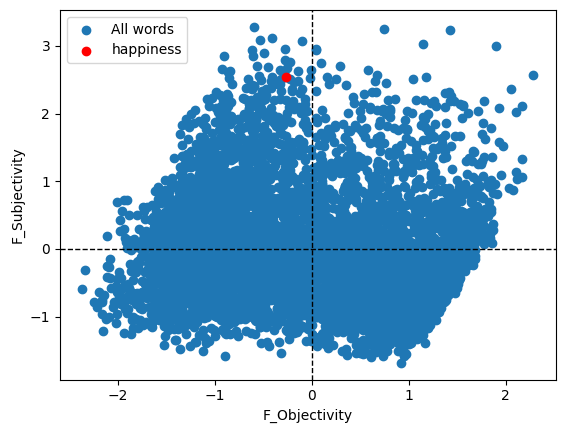

In [228]:
plot_word('happiness')

-----
# Next Steps:
- Calculating a logistic regression making use of the previous factors;  
- Study (and implement) confirmatory factor analysis. What are the differences with EFA? 
- Implement Structural Equation Modeling.

----

# (SEMopy) Structural Equation Modeling
- Important: before running the code below, make sure Graphviz is installed in your system.
  - If using linux, you may run "$sudo apt-get install graphviz".

In [ ]:
import semopy

### Following the TDS Tutorial:
https://towardsdatascience.com/structural-equation-modeling-dca298798f4d

In [ ]:
import boto

In [ ]:
# import the csv file directly from an s3 bucket
data = pd.read_csv('s3://articledatas3/StructuralEquationModelingData.csv')

In [ ]:
data.head()

,PsychTest1,PsychTest2,YrsEdu,IQ,HrsTrn,HrsWrk,ClientSat,SuperSat,ProjCompl
0,62,78,5,97,6,33,84,59,34
1,46,27,2,93,7,54,55,38,56
2,68,75,2,96,5,47,70,68,38
3,55,56,4,103,7,80,63,81,78
4,51,32,4,98,5,53,55,39,56


In [ ]:
# Specify the model relations using the same syntax given before
model_spec = """
  # measurement model
    JobPerf =~ ClientSat + SuperSat + ProjCompl
    Social =~ PsychTest1 + PsychTest2
    Intellect =~ YrsEdu + IQ
    Motivation =~ HrsTrn + HrsWrk
  # regressions
    JobPerf ~ Social + Intellect + Motivation
"""

# Instantiate the model
model = semopy.Model(model_spec)

# Fit the model using the data
model.fit(data)

# Show the results using the inspect method
model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,JobPerf,~,Social,5.212723e-01,0.047859,10.891902,0.0
1,JobPerf,~,Intellect,1.031127e+00,0.115708,8.911477,0.0
2,JobPerf,~,Motivation,2.959681e+00,0.2544,11.633976,0.0
3,ClientSat,~,JobPerf,1.000000e+00,-,-,-
4,SuperSat,~,JobPerf,2.511954e+00,0.20886,12.026972,0.0
5,ProjCompl,~,JobPerf,2.575041e+00,0.219597,11.726212,0.0
6,PsychTest1,~,Social,1.000000e+00,-,-,-
7,PsychTest2,~,Social,2.341175e+00,0.094735,24.712926,0.0
8,YrsEdu,~,Intellect,1.000000e+00,-,-,-
9,IQ,~,Intellect,4.673517e+00,0.496524,9.412475,0.0


In [ ]:
df_M_VAR

,AROU_M,VAL_M,DOM_M,CNC_M,IMAG_M,FAM_M,AOA_M,SIZE_M,GEND_M,AROU_VAR,VAL_VAR,DOM_VAR,CNC_VAR,IMAG_VAR,FAM_VAR,AOA_VAR,SIZE_VAR,GEND_VAR
words,,,,,,,,,,,,,,,,,,
abattoir,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,5.760000,3.027600,1.651225,3.610000,4.498641,3.236401,0.182329,2.399401,1.368900
abbey,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,5.484964,1.607824,2.405601,2.274064,3.538161,3.276100,1.792921,2.653641,1.423249
abbreviate,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,2.502724,1.062961,1.532644,3.003289,2.852721,3.378244,1.276900,2.890000,0.910116
abdicate,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,3.767481,1.912689,4.761124,3.433609,2.313441,4.313929,0.712336,2.076481,1.406596
abdication,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,5.207524,2.585664,3.841600,2.624400,1.674436,4.088484,0.833569,1.825201,1.030225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeppelin,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,4.149369,1.999396,3.038049,0.846400,1.261129,4.473225,0.891136,2.961841,1.042441
zero,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,4.092529,2.512225,4.511376,3.591025,5.508409,1.428025,1.261129,1.940449,0.418609
zest,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,4.656964,1.723969,1.742400,2.869636,2.630884,2.643876,1.261129,3.020644,1.022121


In [ ]:
factors

['F_Objectivity', 'F_Subjectivity', 'F_Context']

In [ ]:
factors.style.applymap(highlight_high_values)

AttributeError: 'list' object has no attribute 'style'

In [ ]:
# Specify the model relations using the same syntax given before
model_spec = """
  # measurement model
    Semantic_Content =~ AROU_M + VAL_M + DOM_M + CNC_M + IMAG_M + FAM_M + AOA_M +SIZE_M
    Subjective_Factor =~ CNC_M + IMAG_M + SIZE_M + CNC_VAR + IMAG_VAR
    Objective_Factor =~ VAL_M + FAM_M + AOA_M + FAM_VAR
  # regressions
    Semantic_Content ~ Subjective_Factor + Objective_Factor
"""

# Instantiate the model
model = semopy.Model(model_spec)

# Fit the model using the data
model.fit(df)

# Show the results using the inspect method
model.inspect()

KeyError: 'Variables FAM_VAR, IMAG_VAR, CNC_VAR are missing from data.'

In [ ]:
# Specify the model relations using the same syntax given before
model_spec = """
  # measurement model
    Semantic_Content =~ Subjective_Factor + Objective_Factor
    Subjective_Factor =~ CNC_M + IMAG_M + SIZE_M + CNC_VAR + IMAG_VAR
    Objective_Factor =~ VAL_M + FAM_M + AOA_M + FAM_VAR
"""

# Instantiate the model
model = semopy.Model(model_spec)

# Fit the model using the data
model.fit(df)

# Show the results using the inspect method
model.inspect()

KeyError: 'Variables FAM_VAR, IMAG_VAR, CNC_VAR are missing from data.'

In [ ]:
g = semopy.semplot(model, '../output/model.png')
g

ModuleNotFoundError: No graphviz module is installed.